In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
from google.colab import userdata
token =userdata.get('Cryptonite-Token')

In [3]:
# Configure Git
!git config --global user.email "idantsri2007@gmail.com"
!git config --global user.name "SILETRO"

In [6]:
!git clone https://{token}@github.com/SILETRO/Cryptonite-RTP-Idant.git
%cd Cryptonite-RTP-Idant

Cloning into 'Cryptonite-RTP-Idant'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 57 (delta 15), reused 45 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (57/57), 992.31 KiB | 3.42 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/content/Cryptonite-RTP-Idant


In [13]:
%cd /content/Cryptonite-RTP-Idant

/content/Cryptonite-RTP-Idant


In [14]:
!mkdir Task-3

mkdir: cannot create directory ‘Task-3’: File exists


In [17]:
!cp '/content/drive/MyDrive/Colab Notebooks/MLP_tensorflow.ipynb' Task-3/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/MLP_tensorflow.ipynb': No such file or directory


In [10]:
!git add .

In [11]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [3]:
y.groupby('income').value_counts()

,count
income,
<=50K,24720
<=50K.,12435
>50K,7841
>50K.,3846


In [4]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [6]:
y['income']=y['income'].replace(['>50K','>50K.'],1)
y['income']=y['income'].replace(['<=50K','<=50K.'],0)

/tmp/ipython-input-2762522299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income']=y['income'].replace(['>50K','>50K.'],1)
/tmp/ipython-input-2762522299.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['income']=y['income'].replace(['<=50K','<=50K.'],0)
/tmp/ipython-input-2762522299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [8]:
y['income'].value_counts()

,count
income,
0,37155
1,11687


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [16]:
X['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

In [11]:
X['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [15]:
X.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_rest,y_train,y_rest = train_test_split(X,y,test_size = 0.2,stratify=y,random_state = 42)

In [42]:
X_test,X_val,y_test,y_val = train_test_split(X_rest,y_rest,test_size = 0.5,stratify=y_rest,random_state=42)

In [45]:
y_val

,income
38615,0
5247,0
17972,0
28453,1
40462,1
...,...
42057,1
46608,0
15797,0
34332,0


In [72]:
num_attribs = X_train.select_dtypes(include='number').columns.tolist()
cat_attribs = X_train.select_dtypes(include='object').columns.tolist()

In [73]:
num_attribs

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [68]:
cat_attribs

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [75]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [76]:
preprocess_pipeline = ColumnTransformer([("num",num_pipeline,num_attribs),("cat",cat_pipeline,cat_attribs)])

In [78]:
X_train_processed = preprocess_pipeline.fit_transform(X_train)
X_test_processed = preprocess_pipeline.transform(X_test)
X_val_processed = preprocess_pipeline.transform(X_val)

In [79]:
X_train_processed

array([[-0.12009008,  0.02952118,  1.13821044, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.26824482,  0.25260617, -0.80402454, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.04903405, -0.59743961, -0.41557754, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.63359611,  0.37041553, -0.02713055, ...,  1.        ,
         0.        ,  0.        ],
       [-0.04701982, -1.02419277,  0.36131645, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.31833147, -0.71866208, -0.02713055, ...,  1.        ,
         0.        ,  0.        ]])

In [81]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

In [166]:
from functools import partial
RegularizedDense = partial(tf.keras.layers.Dense,
activation="relu", kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.001))
model = tf.keras.Sequential([
RegularizedDense(100),
RegularizedDense(100),
RegularizedDense(100),
RegularizedDense(1, activation="sigmoid")
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [167]:
model.compile(loss = 'binary_crossentropy',optimizer = optimizer,metrics = ['accuracy'])

In [168]:
model.fit(X_train_processed,y_train,validation_data=(X_val_processed,y_val),epochs=20)

Epoch 1/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8360 - loss: 0.6477 - val_accuracy: 0.8477 - val_loss: 0.3851
Epoch 2/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8500 - loss: 0.3723 - val_accuracy: 0.8495 - val_loss: 0.3490
Epoch 3/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8502 - loss: 0.3454 - val_accuracy: 0.8491 - val_loss: 0.3409
Epoch 4/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8515 - loss: 0.3379 - val_accuracy: 0.8504 - val_loss: 0.3371
Epoch 5/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8522 - loss: 0.3347 - val_accuracy: 0.8514 - val_loss: 0.3355
Epoch 6/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8525 - loss: 0.3326 - val_accuracy: 0.8522 - val_loss: 0.3342
Epoch 7/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8529 - loss: 0.3312 - val_accuracy: 0.8530 - val_loss: 0.3327
Epoch 8/20
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8535 - loss: 0.3300 - 

In [169]:
model.evaluate(X_test_processed,y_test)

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.3078


[0.31596529483795166, 0.8650696277618408]

In [187]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
y_pred = model.predict(X_test_processed)
y_pred_class = (y_pred>0.5).astype(int)

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [188]:
accuracy_score(y_pred_class, y_test)

0.8650696150696151

In [189]:
precision_score(y_pred_class, y_test)

0.6903336184773311

In [190]:
recall_score(y_pred_class, y_test)

0.7309782608695652

In [177]:
f1_score(y_pred_class, y_test)

0.710074791025077

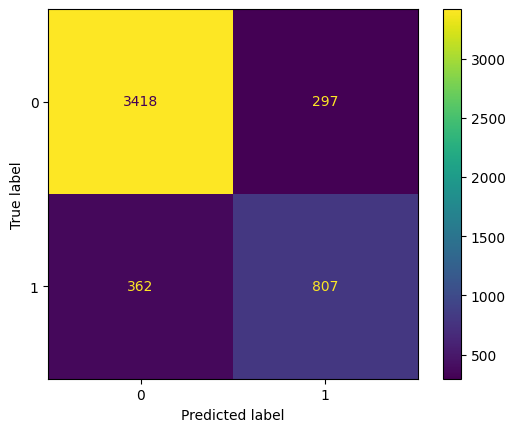

In [193]:
cm = confusion_matrix(y_test,y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()